In [1]:
import numpy as np
import os
import sys
from matplotlib import pyplot as plt


In [ ]:
def rename(nexp, nexec, ngen, de_alg):

	current_dir = os.getcwd()

	for k in range(nexp):
		
		exp = str(k+1) + 'exp'

		try:
			for j in range(nexec):			
				
				print(exp + " " + str(j+1))

				exec_path = os.path.join(os.getcwd(), 'analysis', de_alg, exp, str(j+1))
				cmd = "cp rename.sh " + os.path.join(exec_path, 'rename.sh')
				os.system(cmd)

				history_path = os.path.join(exec_path, 'history')

				cmd = "cp -R {} {}.backup".format(history_path, history_path)
				os.system(cmd)

				cmd = "cd {} && ./rename.sh {} && cd {}".format(exec_path, ngen, current_dir)
				os.system(cmd)
				os.system("sync")
				
		except:
			raise("Houve algum erro durante a renomeação.")
		
	# print("Renomeado com sucesso.")

In [11]:
def plot_experiment_analisys(nexp, nexec, ngen, de_alg, labels):

	media_dez_melhores = []
	media_dez_piores   = []
	media 			   = []
	media_GRIEF 	   = []
	# media_GRIEF_dez_melhores = []
	# media_GRIEF_dez_piores = []

	exp_dict = {
		'media': np.empty((0, ngen), int),
		'media_dez_melhores': np.empty((0, ngen), int),
		'media_dez_piores': np.empty((0, ngen), int)
	}

	data = []

	plt.figure(figsize=(12,8))
	plt.style.use('ggplot')
	

	for i in range(nexp):
		data.append(exp_dict)

	for k in range(nexp):
		
		exp = str(k+1) + 'exp'
		
		for j in range(nexec):
			
			path = os.path.join(os.getcwd(), 'analysis', de_alg, exp, str(j+1), 'history')
		
			for i in range(ngen):
				file = str(i+1).zfill(5)+'.txt'
				pop = np.loadtxt(os.path.join(path, file), delimiter=' ', dtype=int)
				
				idx_ordem = np.argsort(pop[:,4])
				media_dez_melhores.append(np.mean(pop[idx_ordem[-10:],4]))
				media_dez_piores.append(np.mean(pop[idx_ordem[:10],4]))
				media.append(np.mean(pop[:,4]))

				media_GRIEF.append(np.mean(pop[:,4]))
				
			data[k]['media'] = np.append(data[k]['media'],[media], axis=0)

			media_dez_melhores = []
			media_dez_piores = []
			media = []
			media_GRIEF = []
			# media_GRIEF_dez_melhores = []
			# media_GRIEF_dez_piores = []
		
		
		plt.plot(np.mean(data[k]['media'], axis=0) - 100, label=labels[k])
	
	plt.xlabel("Gerações")
	plt.ylabel("Fitness")
	plt.legend()
	plt.show()


In [13]:
nexp = 3
nexec = 4
ngen = 1000
alg = 'randtobest_1_bin_obl'

labels = ["gen_rate = 5%", "gen_rate = 10%", "gen_rate = 20%"]

In [ ]:
print('Renomeando...')
rename(
    nexp=nexp,
    nexec=nexec,
    ngen=ngen,
    de_alg=alg,
    labels=labels
)

Processando...


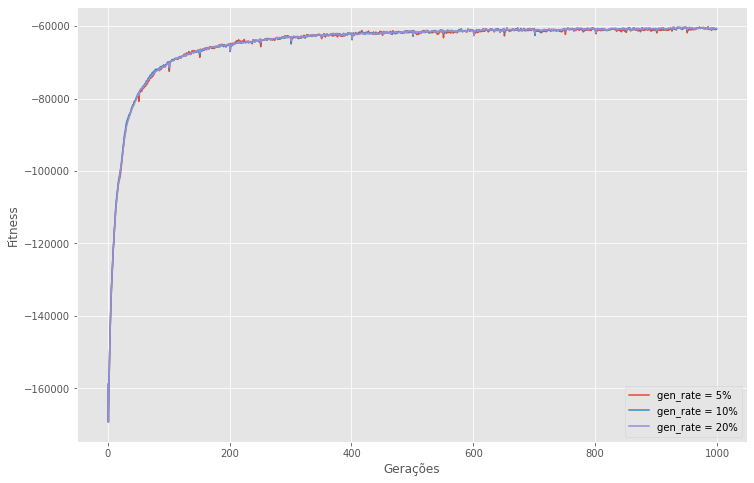

In [14]:

print("Processando...")
plot_experiment_analisys(
    nexp=nexp,
    nexec=nexec,
    ngen=ngen,
    de_alg=alg,
    labels=labels
)